In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
print(torch.cuda.get_device_properties(0))

_CudaDeviceProperties(name='NVIDIA GeForce RTX 3050 Laptop GPU', major=8, minor=6, total_memory=4095MB, multi_processor_count=16, uuid=576a688a-2904-e9f2-b226-f216001d0e7c, L2_cache_size=1MB)


In [4]:
from torch import nn
torch.__version__

'2.5.1'

In [5]:
from pathlib import Path
data_path = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Trained")
image_path = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Trained\\train")

In [6]:
import os 
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are :{len(dirnames)} directories and {len(filenames)} images in {dirpath}')  
        #print(dirpath)
        #print(dirpath,dirnames,filenames)
        

In [7]:
walk_through_dir(image_path)

There are :4 directories and 0 images in C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\train
There are :0 directories and 630 images in C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\train\Hexa_Ideal_Saved_Images_Resized
There are :0 directories and 630 images in C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\train\Octa_Ideal_Saved_Images_Resized
There are :0 directories and 630 images in C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\train\Quad_Ideal_Saved_Images_Resized
There are :0 directories and 630 images in C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\train\Tri_Ideal_Saved_Images_Resized


In [8]:
# setupn train and test paths
train_dir = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Trained\\train")
test_dir = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Trained\\test")
val_dir = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Trained\\val")
train_dir,test_dir,val_dir

(WindowsPath('C:/Users/user/OneDrive/Desktop/IIT Delhi/BTP/Results/Trained/train'),
 WindowsPath('C:/Users/user/OneDrive/Desktop/IIT Delhi/BTP/Results/Trained/test'),
 WindowsPath('C:/Users/user/OneDrive/Desktop/IIT Delhi/BTP/Results/Trained/val'))

 Random image path:C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\train\Hexa_Ideal_Saved_Images_Resized\Ideal300_hexa85_10_60.png
image class:Hexa_Ideal_Saved_Images_Resized
image height:256
image width :256


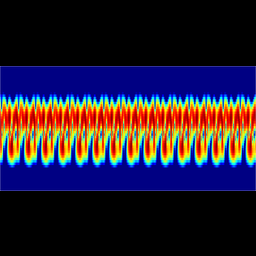

In [9]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(image_path.glob('*/*.png'))
random_image_path =  random.choice(image_path_list)
image_class =  random_image_path.parent.stem
img = Image.open(random_image_path)
print(f' Random image path:{random_image_path}')
print(f'image class:{image_class}')
print(f'image height:{img.height}')
print(f'image width :{img.width}')
img

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

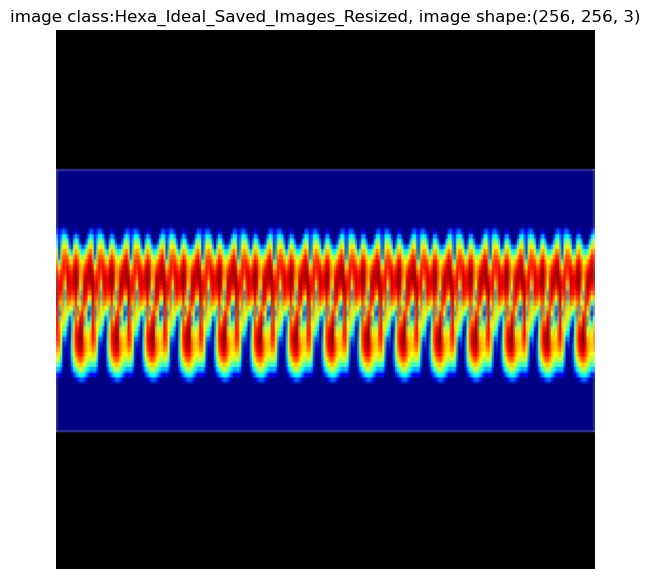

In [10]:
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.asarray(img)
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f'image class:{image_class}, image shape:{img_as_array.shape}')
plt.axis('off')

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [12]:
data_transforms= transforms.Compose([transforms.ToTensor()])

In [13]:
train_data_transforms=  transforms.Compose([transforms.ToTensor(),
                                      transforms.RandomAffine(degrees=0,scale=(0.9,1.1)),
                                      transforms.ColorJitter(brightness=0.4,
                                                             saturation=0.4,
                                                             hue=0.015),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.Resize((256,256))])
test_data_transforms = transforms.Compose([transforms.ToTensor(),
                                          transforms.Resize((256,256))])
val_data_transforms = transforms.Compose([transforms.ToTensor(),
                                          transforms.Resize((256,256))])

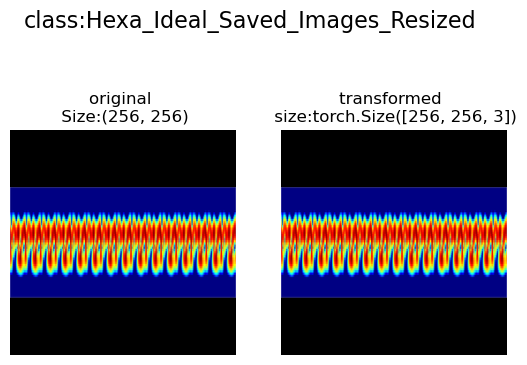

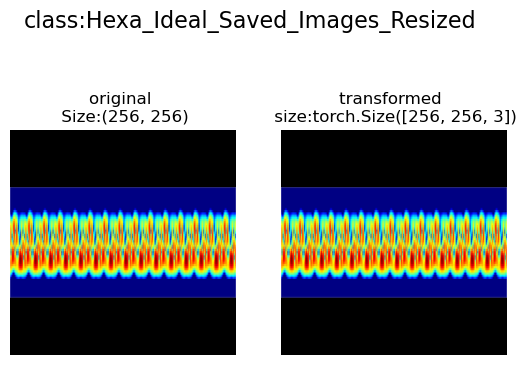

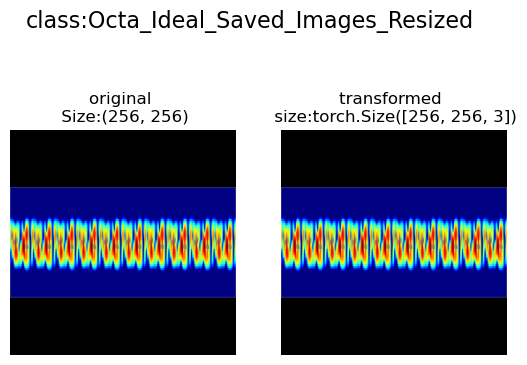

In [14]:
def plot_transformed_images(image_paths, transform, n=3, seed =42):
    random.seed(seed)
    random_image_paths =  random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax =  plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f'original \n Size:{f.size}')
            ax[0].axis(False)
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'transformed \n size:{transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'class:{image_path.parent.stem}', fontsize=16)


plot_transformed_images(image_paths = image_path_list,
                        transform = data_transforms)
                        

In [15]:
from torchvision import datasets
train_data =  datasets.ImageFolder(root = train_dir,
                                   transform = train_data_transforms,
                                   target_transform =  None)
test_data = datasets.ImageFolder(root =test_dir,
                                 transform=test_data_transforms)
val_data = datasets.ImageFolder(root =val_dir,
                                 transform=val_data_transforms)
print(f'train data:\n {train_data},\n test data:\n{test_data},\n val data:\n{val_data}')

train data:
 Dataset ImageFolder
    Number of datapoints: 2520
    Root location: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\train
    StandardTransform
Transform: Compose(
               ToTensor()
               RandomAffine(degrees=[0.0, 0.0], scale=(0.9, 1.1))
               ColorJitter(brightness=(0.6, 1.4), contrast=None, saturation=(0.6, 1.4), hue=(-0.015, 0.015))
               RandomHorizontalFlip(p=0.5)
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
           ),
 test data:
Dataset ImageFolder
    Number of datapoints: 540
    Root location: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Trained\test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
           ),
 val data:
Dataset ImageFolder
    Number of datapoints: 540
    Root location: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\

In [16]:
class_names =  train_data.classes
class_names

['Hexa_Ideal_Saved_Images_Resized',
 'Octa_Ideal_Saved_Images_Resized',
 'Quad_Ideal_Saved_Images_Resized',
 'Tri_Ideal_Saved_Images_Resized']

In [17]:
from torch.utils.data import DataLoader
BATCH_SIZE =8
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle= True)

test_dataloader = DataLoader(dataset= test_data,
                             batch_size = BATCH_SIZE,
                             shuffle= False)

val_dataloader = DataLoader(dataset= val_data,
                             batch_size = BATCH_SIZE,
                             shuffle= False)
train_dataloader,test_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1779454b550>,
 <torch.utils.data.dataloader.DataLoader at 0x1779454af20>)

In [18]:
def train_step(model: torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer):
    model.train()
    train_loss,train_acc= 0 ,0
    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device),y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss+= loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=  (y_pred_class==y).sum().item()/len(y_pred)

    train_loss/= len(dataloader)
    train_acc/= len(dataloader)
    return train_loss,train_acc    
    

In [19]:
def test_step(model: torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
             ):
    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in dataloader:
            X,y = X.to(device),y.to(device)
            test_pred = model(X)
            loss = loss_fn(test_pred,y)
            test_loss+= loss
            test_pred_class = torch.argmax(torch.softmax(test_pred,dim=1),dim=1)
            test_acc+=(test_pred_class==y).sum().item()/len(test_pred)

        test_loss/= len(dataloader)
        test_acc/= len(dataloader)
        return test_loss, test_acc


In [20]:
from tqdm.auto import tqdm
import torch.nn as nn

def train(model: torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5):

      results= {'train_acc':[],
                 'train_loss':[],
                'test_acc':[],'test_loss':[]}
      for epoch in tqdm(range(epochs)):
       train_loss, train_acc = train_step(model= model,
                                         dataloader = train_dataloader,
                                         loss_fn = loss_fn,
                                         optimizer= optimizer)
       test_loss,test_acc = test_step(model=model,
                                      dataloader=test_dataloader,
                                      loss_fn= loss_fn)
       print(f'epoch:{epoch}|'
       f'train_loss:{train_loss:.4f}|'
       f'train_acc:{train_acc:.4f}|'
       f'test_loss:{test_loss:.4f}|'
       f'test_acc:{test_acc:.4f}')

       results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
       results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
       results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
       results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
       
      return results
                                         
       

In [21]:
def plot_loss_curves(results:dict[str, list[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    epochs = range(len(results['train_acc']))
    plt.figure(figsize=(15,7))
    # plot loss
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label='train_loss')
    plt.plot(epochs,test_loss,label = 'test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label= 'train_accuracy')
    plt.plot(epochs, test_accuracy,label ='test_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    
    

In [22]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [23]:
import torch.nn as nn
from ultralytics.nn.modules.conv import Conv
from ultralytics.nn.modules.block import C2f,Bottleneck

In [24]:
class YOLOv8l(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.conv1 = Conv(3,64,k=3,s=2)
        self.conv2 = Conv(64,128,k=3,s=2)
        self.C2f_1= C2f(128,128,n=3,shortcut=True)
        self.conv3 = Conv(128,256,k=3,s=2)
        self.C2f_2= C2f(256,256,n=6,shortcut=True)
        self.conv4 =Conv(256,512,k=3,s=2)
        self.C2f_3 = C2f(512,512,n=6,shortcut=True)
        self.conv5= Conv(512,1024,k=3,s=2)
        self.C2f_4 =  C2f(1024,1024,n=3, shortcut=True)
        
        self.classifier = nn.Sequential(Conv(1024,1280,k=1,s=1),
                                        nn.AdaptiveAvgPool2d((1,1)),
                                        nn.Flatten(),
                                        nn.Linear(1280,num_classes)
                                       )
                                       

    def forward(self,x):
       x= self.conv1(x)
       x= self.conv2(x)
       x= self.C2f_1(x)
       x= self.conv3(x)
       x= self.C2f_2(x)
       x= self.conv4(x)
       x= self.C2f_3(x)
       x= self.conv5(x)
       x= self.C2f_4(x)
       #x= self.avgpool(x)
       #print(x.shape)
       x= self.classifier(x)
       return x 

    def extract_features(self,x):
       x= self.conv1(x)
       x= self.conv2(x)
       x= self.C2f_1(x)
       x= self.conv3(x)
       x= self.C2f_2(x)
       x= self.conv4(x)
       
       x= self.conv5(x)
       return x
       

In [25]:
yolo_model = YOLOv8l(num_classes=4).to(device)
sample = torch.randn(32,3,224,224)
output= yolo_model(sample.to(device))
print(output.shape)

torch.Size([32, 4])


In [ ]:
NUM_EPOCHS=40
torch.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer =  torch.optim.AdamW(params = yolo_model.parameters(),
                              lr = 0.0001,weight_decay=0.00005)
from timeit import default_timer as timer

start_timer = timer()
yolo_model_results = train(yolo_model,
                        train_dataloader = train_dataloader,
                        test_dataloader = val_dataloader,
                        optimizer =  optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

end_timer = timer()

  0%|          | 0/40 [00:00<?, ?it/s]

epoch:0|train_loss:1.1650|train_acc:0.3925|test_loss:0.8819|test_acc:0.5055


In [29]:
import torch
import torch.nn as nn
from sklearn.metrics import classification_report

# Assuming you have a DataLoader for the test set
yolo_model.eval()  # Set model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = yolo_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Get classification report
print(classification_report(all_labels, all_preds, target_names=class_names))


ModuleNotFoundError: No module named 'sklearn'

Classification Metrics Table:
   Accuracy  Precision    Recall  F1-Score
0  0.610644   0.627825  0.610644  0.613339

Confusion Matrix:
[[ 22   0  43   7]
 [  1 109   2   0]
 [ 19   0  43  25]
 [  8   0  34  44]]


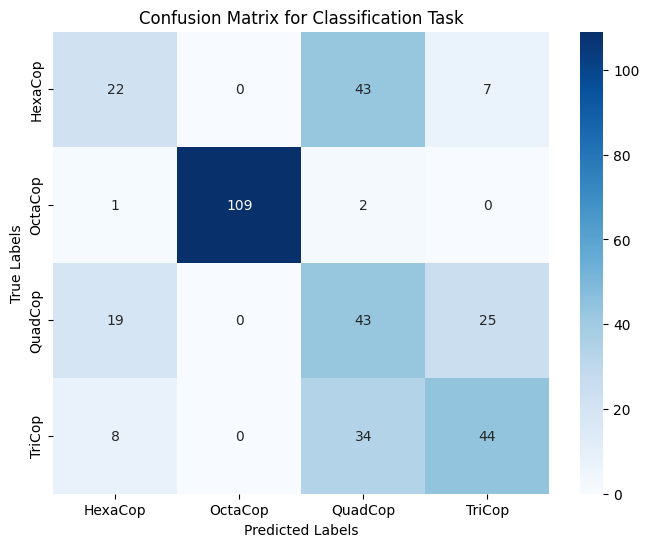


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.31      0.36        72
           1       1.00      0.97      0.99       112
           2       0.35      0.49      0.41        87
           3       0.58      0.51      0.54        86

    accuracy                           0.61       357
   macro avg       0.59      0.57      0.58       357
weighted avg       0.63      0.61      0.61       357



In [31]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
yolo_model.to(device)
# Assuming you have a DataLoader for the test set
yolo_model.eval()  # Set model to evaluation mode

all_preds = []
all_y_true = []
digits = load_digits()
with torch.inference_mode():
    for X, y_true in test_dataloader:
        X, y_true = X.to(device), y_true.to(device)
        y_preds = yolo_model(X)
        pred_class = torch.argmax(torch.softmax(y_preds,dim=1),dim=1)
        #print(pred_class)
        all_preds.extend(pred_class.cpu().numpy())
        #print(all_preds)
        all_y_true.extend(y_true.cpu().numpy())

def display_classification_metrics(y_true, y_pred):
    # Create a dictionary to store the metrics
    metrics = {
        "Accuracy": [accuracy_score(y_true, y_pred)],
        "Precision": [precision_score(y_true, y_pred, average='weighted')],
        "Recall": [recall_score(y_true, y_pred, average='weighted')],
        "F1-Score": [f1_score(y_true, y_pred, average='weighted')]
    }
    
    # Create a DataFrame to display the metrics as a table
    metrics_table = pd.DataFrame(metrics)
      # Display the table
    print("Classification Metrics Table:")
    print(metrics_table)
    
    # Print the confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Classification Task')
    plt.show()
    
    # Print detailed classification report for each class
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))
display_classification_metrics(all_y_true, all_preds)
# Get classification report
#print(classification_report(all_y_true, all_preds, target_names=class_names))
#all_preds

In [101]:
loss_fn= nn.CrossEntropyLoss()
test_loss, test_acc = test_step(model=yolo_model,
                                dataloader=test_dataloader,
                                loss_fn=loss_fn)
test_acc

0.6096491228070176

In [81]:
save_dir = "YOLO_classification_models_synthetic/"
os.makedirs(save_dir, exist_ok=True)  # Create the folder if it doesn't exist

torch.save(yolo_model.state_dict(), os.path.join(save_dir, "yolov8_ideal_synth_wind.pth"))

In [33]:

yolo_model = YOLOv8l(num_classes=4).to(device)
yolo_model.load_state_dict(torch.load("YOLO_classification_models_synthetic/yolov8_ideal_synthetic.pth"))

<All keys matched successfully>

In [27]:

yolo_model = YOLOv8l(num_classes=4).to(device)
yolo_model.load_state_dict(torch.load("YOLO_classification_models_synthetic/yolov8_ideal_synth_wind.pth"))

<All keys matched successfully>

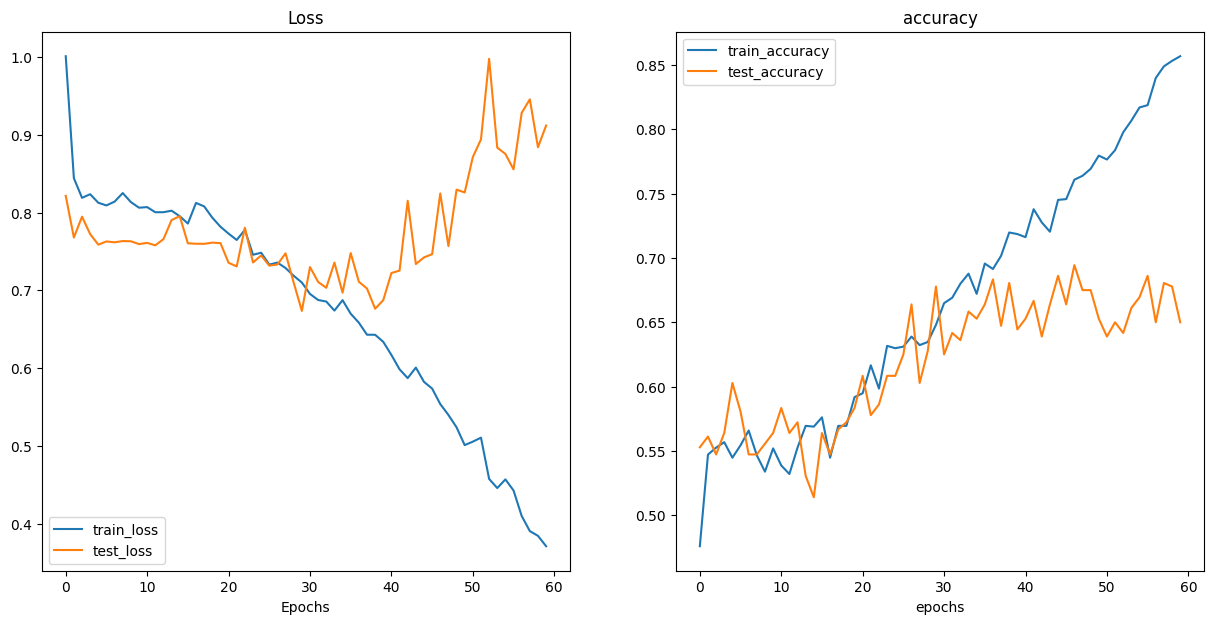

In [32]:
plot_loss_curves(yolo_model_results)

# TEST


In [28]:
data_path = Path('data')
test_path = Path(data_path/'md_synth_test/')
test_path


WindowsPath('data/md_synth_test')

In [29]:
walk_through_dir(test_path)

There are :6 directories and 0 images in data\md_synth_test
There are :4 directories and 0 images in data\md_synth_test\test_calm
There are :0 directories and 75 images in data\md_synth_test\test_calm\HexaCop
There are :0 directories and 75 images in data\md_synth_test\test_calm\OctaCop
There are :0 directories and 75 images in data\md_synth_test\test_calm\QuadCop
There are :0 directories and 76 images in data\md_synth_test\test_calm\TriCop
There are :4 directories and 0 images in data\md_synth_test\test_ideal_imsc
There are :0 directories and 93 images in data\md_synth_test\test_ideal_imsc\HexaCop
There are :0 directories and 91 images in data\md_synth_test\test_ideal_imsc\OctaCop
There are :0 directories and 94 images in data\md_synth_test\test_ideal_imsc\QuadCop
There are :0 directories and 97 images in data\md_synth_test\test_ideal_imsc\TriCop
There are :4 directories and 0 images in data\md_synth_test\test_ideal_merged
There are :0 directories and 146 images in data\md_synth_test\

In [30]:

test_dir = Path(test_path/'test_wind/')
test_data_transforms = transforms.Compose([transforms.ToTensor(),
                                          transforms.Resize((256,256))])

In [31]:
walk_through_dir(test_dir)

There are :4 directories and 0 images in data\md_synth_test\test_wind
There are :0 directories and 75 images in data\md_synth_test\test_wind\HexaCop
There are :0 directories and 75 images in data\md_synth_test\test_wind\OctaCop
There are :0 directories and 75 images in data\md_synth_test\test_wind\QuadCop
There are :0 directories and 75 images in data\md_synth_test\test_wind\TriCop


In [32]:
test_data = datasets.ImageFolder(root =test_dir,
                                 transform=test_data_transforms)
test_dataloader = DataLoader(dataset= test_data,
                             batch_size = BATCH_SIZE,
                             shuffle= False)

 Random image path:data\md_synth_test\test_ideal_imsc\OctaCop\Ideal_octa60_80_20.png
image class:OctaCop
image height:256
image width :256


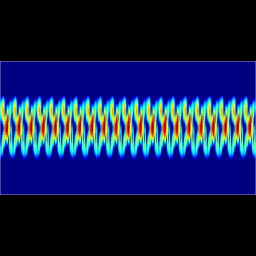

In [33]:
import random
from PIL import Image
random.seed(42)
image_path_list = list(test_path.glob('*/*/*.png'))
random_image_path =  random.choice(image_path_list)
image_class =  random_image_path.parent.stem
img = Image.open(random_image_path)
print(f' Random image path:{random_image_path}')
print(f'image class:{image_class}')
print(f'image height:{img.height}')
print(f'image width :{img.width}')
img

In [34]:
loss_fn= nn.CrossEntropyLoss()
test_loss, test_acc = test_step(model=yolo_model,
                                dataloader=test_dataloader,
                                loss_fn=loss_fn)
test_acc

0.7598684210526315

Classification Metrics Table:
   Accuracy  Precision  Recall  F1-Score
0      0.76   0.763316    0.76  0.758441

Confusion Matrix:
[[71  2  2  0]
 [ 2 57  1 15]
 [ 0  0 62 13]
 [ 0  9 28 38]]


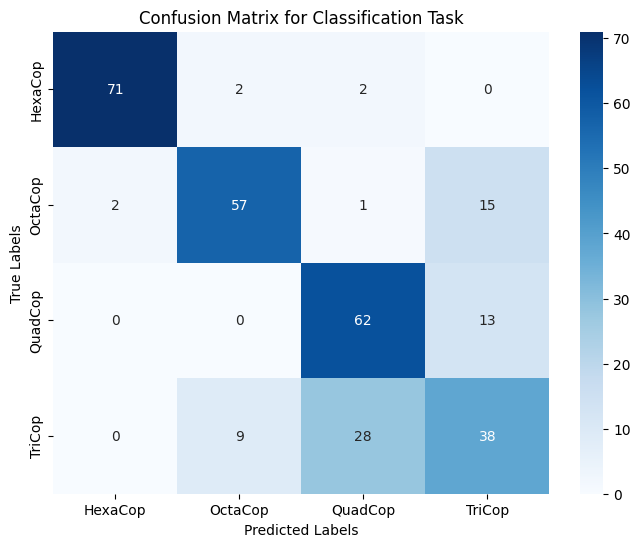


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.84      0.76      0.80        75
           2       0.67      0.83      0.74        75
           3       0.58      0.51      0.54        75

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [35]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
yolo_model.to(device)
# Assuming you have a DataLoader for the test set
yolo_model.eval()  # Set model to evaluation mode

all_preds = []
all_y_true = []
digits = load_digits()
with torch.inference_mode():
    for X, y_true in test_dataloader:
        X, y_true = X.to(device), y_true.to(device)
        y_preds = yolo_model(X)
        pred_class = torch.argmax(torch.softmax(y_preds,dim=1),dim=1)
        #print(pred_class)
        all_preds.extend(pred_class.cpu().numpy())
        #print(all_preds)
        all_y_true.extend(y_true.cpu().numpy())

def display_classification_metrics(y_true, y_pred):
    # Create a dictionary to store the metrics
    metrics = {
        "Accuracy": [accuracy_score(y_true, y_pred)],
        "Precision": [precision_score(y_true, y_pred, average='weighted')],
        "Recall": [recall_score(y_true, y_pred, average='weighted')],
        "F1-Score": [f1_score(y_true, y_pred, average='weighted')]
    }
    
    # Create a DataFrame to display the metrics as a table
    metrics_table = pd.DataFrame(metrics)
      # Display the table
    print("Classification Metrics Table:")
    print(metrics_table)
    
    # Print the confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Classification Task')
    plt.show()
    
    # Print detailed classification report for each class
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))
display_classification_metrics(all_y_true, all_preds)
# Get classification report
#print(classification_report(all_y_true, all_preds, target_names=class_names))
#all_preds

# Resize


In [1]:
pip install pillow


   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------------------- ------------------ 3.7/7.0 MB 21.8 MB/s eta 0:00:01
   ---------------------------------------  6.8/7.0 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 16.0 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
'''import os
from PIL import Image

folder_path = Path(test_dir/'TriCop')

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    try:
        with Image.open(file_path) as img:
            img_resized = img.resize((256, 256), Image.Resampling.LANCZOS)
            img_resized.save(file_path)
            print(f"Resized: {filename}")
    except Exception as e:
        print(f"Skipped {filename}: {e}")
'''

'import os\nfrom PIL import Image\n\nfolder_path = Path(test_dir/\'TriCop\')\n\nfor filename in os.listdir(folder_path):\n    file_path = os.path.join(folder_path, filename)\n\n    try:\n        with Image.open(file_path) as img:\n            img_resized = img.resize((256, 256), Image.Resampling.LANCZOS)\n            img_resized.save(file_path)\n            print(f"Resized: {filename}")\n    except Exception as e:\n        print(f"Skipped {filename}: {e}")\n'

In [5]:
'''import os
from PIL import Image

# Path to your main directory
data_path= Path('data')

#main_directory = Path(test_path/'test_ideal2')

main_directory = Path(data_path/'micro-doppler_synth_wind_imagesc_big')
# Walk through all subdirectories and files
for dirpath, dirnames, filenames in os.walk(main_directory):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        
        try:
            with Image.open(file_path) as img:
                img_resized = img.resize((256, 256), Image.Resampling.LANCZOS)
                img_resized.save(file_path)
                print(f"Resized: {file_path}")
        except Exception as e:
            print(f"Skipped {file_path}: {e}")'''


'import os\nfrom PIL import Image\n\n# Path to your main directory\ndata_path= Path(\'data\')\n\n#main_directory = Path(test_path/\'test_ideal2\')\n\nmain_directory = Path(data_path/\'micro-doppler_synth_wind_imagesc_big\')\n# Walk through all subdirectories and files\nfor dirpath, dirnames, filenames in os.walk(main_directory):\n    for filename in filenames:\n        file_path = os.path.join(dirpath, filename)\n\n        try:\n            with Image.open(file_path) as img:\n                img_resized = img.resize((256, 256), Image.Resampling.LANCZOS)\n                img_resized.save(file_path)\n                print(f"Resized: {file_path}")\n        except Exception as e:\n            print(f"Skipped {file_path}: {e}")'

# Resize with aspect ratio


In [3]:
import os
from pathlib import Path
from PIL import Image, ImageOps

# Define your input and output folders
input_root = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Tri_Ideal_Saved_Images")
output_root = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Tri_Ideal_Saved_Images_Resized")

# Walk through all subdirectories and files
for dirpath, dirnames, filenames in os.walk(input_root):
    # Compute relative path from input_root
    relative_path = os.path.relpath(dirpath, input_root)
    
    # Create matching output folder
    output_dir = os.path.join(output_root, relative_path)
    os.makedirs(output_dir, exist_ok=True)
    
    for filename in filenames:
        input_file = os.path.join(dirpath, filename)
        output_file = os.path.join(output_dir, filename)
        
        try:
            img = Image.open(input_file)
            
            # Resize proportionally to fit within 256x256
            img_resized = ImageOps.contain(
                img, (256, 256), Image.Resampling.LANCZOS
            )
            
            # Pad to exactly 256x256 (black background)
            img_padded = ImageOps.pad(
                img_resized, (256, 256),
                color=(0, 0, 0)  # change to (255,255,255) for white padding
            )
            
            # Save to new location
            img_padded.save(output_file)
            print(f"Saved: {output_file}")
        
        except Exception as e:
            print(f"Skipped {input_file}: {e}")


Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_20.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_25.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_30.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_35.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_40.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_45.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_50.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_Ideal_Saved_Images_Resized\.\Ideal300_tri50_0_55.png
Saved: C:\Users\user\OneDrive\Desktop\IIT Delhi\BTP\Results\Tri_

# Train Test Val Split


In [4]:
import os
import shutil
from pathlib import Path
import random

# Your original dataset directory
original_dataset_dir = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Resized")

# Your target output directories
base_output_dir = Path("C:\\Users\\user\\OneDrive\\Desktop\\IIT Delhi\\BTP\\Results\\Trained")
train_dir = os.path.join(base_output_dir, "train")
val_dir = os.path.join(base_output_dir, "val")
test_dir = os.path.join(base_output_dir, "test")

# Create output directories if they don't exist
for split_dir in [train_dir, val_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)

# Set split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# For each class folder
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    # List all images in the class folder
    images = os.listdir(class_path)
    images = [img for img in images if os.path.isfile(os.path.join(class_path, img))]

    # Shuffle images
    random.shuffle(images)

    # Compute split indices
    total = len(images)
    train_count = int(total * train_ratio)
    val_count = int(total * val_ratio)

    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Define where to save
    splits = {
        train_dir: train_images,
        val_dir: val_images,
        test_dir: test_images
    }

    for split_dir, split_images in splits.items():
        # Make subfolder for the class
        split_class_dir = os.path.join(split_dir, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

        # Copy images
        for img_name in split_images:
            src_path = os.path.join(class_path, img_name)
            dst_path = os.path.join(split_class_dir, img_name)
            shutil.copy2(src_path, dst_path)

    print(f"Processed class: {class_name}")

print("Splitting complete!")


Processed class: Hexa_Ideal_Saved_Images_Resized
Processed class: Octa_Ideal_Saved_Images_Resized
Processed class: Quad_Ideal_Saved_Images_Resized
Processed class: Tri_Ideal_Saved_Images_Resized
Splitting complete!
